In [ ]:
# Reading the file
import pandas as pd

df = pd.read_csv('airbnb_Dallas_updated.csv')

# Checking for missing values
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill missing values in categorical columns with the mode
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Dropping Duplicates to avoid skewness
df = df.drop_duplicates()

# Extracting relevant information from the Scraped Date Column

df['Scraped Date'] = pd.to_datetime(df['Scraped Date'])

# Extract year and month
df['Year'] = df['Scraped Date'].dt.year
df['Month'] = df['Scraped Date'].dt.month

# Determine the quarter
df['Quarter'] = df['Scraped Date'].dt.quarter

# Display the resulting DataFrame
print(df[['Scraped Date', 'Year', 'Month', 'Quarter']])

df = df.drop(['prop_5_StarReviews_pastYear'], axis=1)

df = df.drop(['prev_prop_5_StarReviews_pastYear'], axis=1)

df = df.drop(['zip_hispanic_or_latino_anyrace_percent'], axis=1)
df = df.drop(['zip_white_nothispanic_percent'], axis=1)
df = df.drop(['zip_black_nothispanic_percent'], axis=1)
df = df.drop(['zip_asian_nothispanic_percent'], axis=1)

df.to_csv('cleaned_data.csv', index=False)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a CSV file named 'airbnb_data.csv'
df = pd.read_csv('/content/cleaned_data.csv')


Number of Ratings and Number of 5-Star Ratings on Occupancy

<ipython-input-2-01a5af587997>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  occupancy_ratings = df.groupby('occupancy_rate')['Number of Reviews', 'num_5_star_Rev_pastYear'].mean()


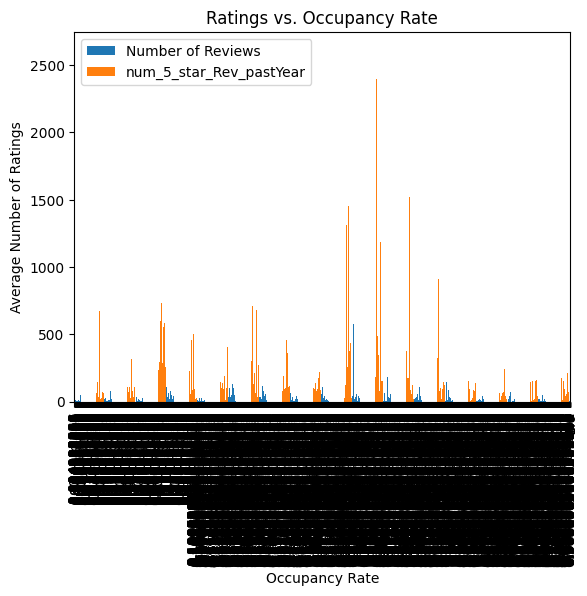

In [2]:
# Group data by occupancy rate and calculate mean number of ratings and 5-star ratings
occupancy_ratings = df.groupby('occupancy_rate')['Number of Reviews', 'num_5_star_Rev_pastYear'].mean()

# Plot
occupancy_ratings.plot(kind='bar')
plt.title('Ratings vs. Occupancy Rate')
plt.xlabel('Occupancy Rate')
plt.ylabel('Average Number of Ratings')
plt.show()


Average Price by Neighborhood

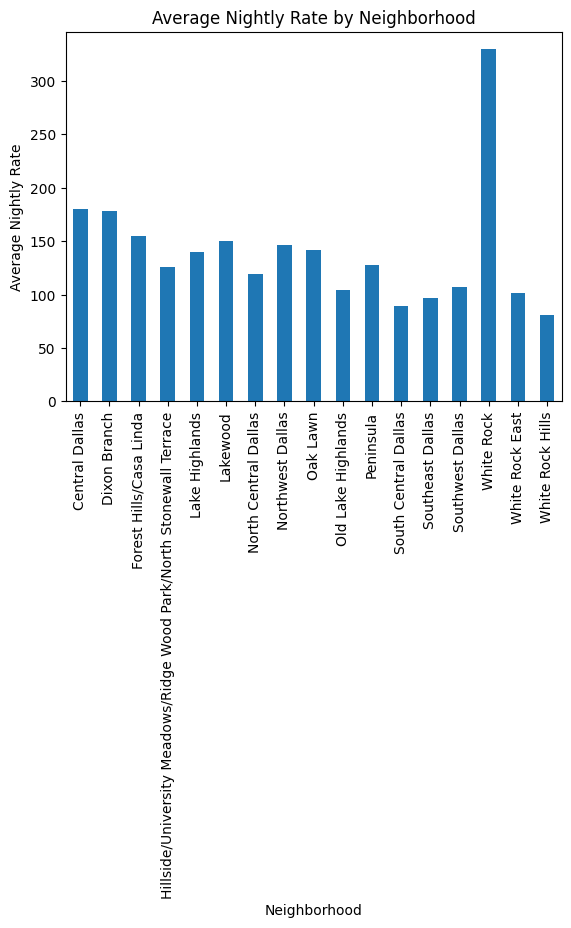

In [3]:
# Calculate average price by neighborhood
avg_price_neighborhood = df.groupby('Neighborhood')['Nightly Rate'].mean()

# Plot
avg_price_neighborhood.plot(kind='bar')
plt.title('Average Nightly Rate by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Nightly Rate')
plt.show()


Average Price for Different Tracts

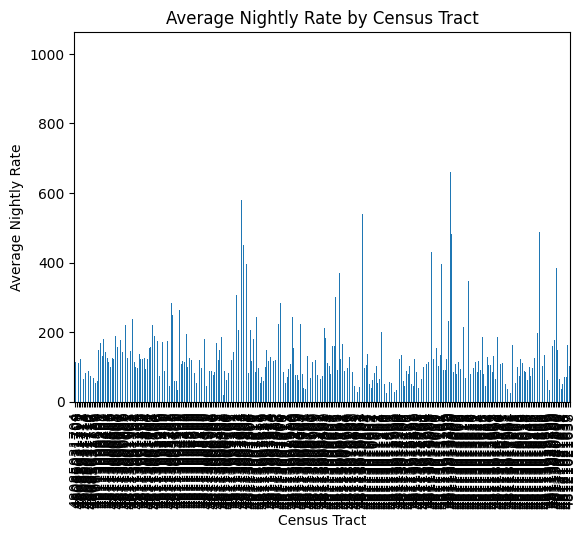

In [4]:
# Calculate average price for different tracts
avg_price_tracts = df.groupby('census_tract')['Nightly Rate'].mean()

# Plot
avg_price_tracts.plot(kind='bar')
plt.title('Average Nightly Rate by Census Tract')
plt.xlabel('Census Tract')
plt.ylabel('Average Nightly Rate')
plt.show()


Average Price for Different Zipcodes

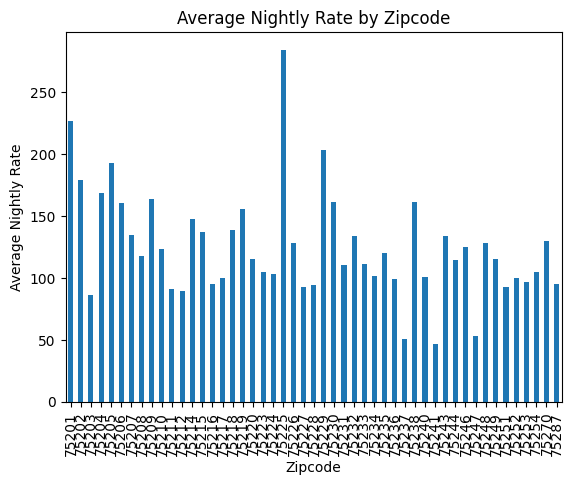

In [5]:
# Calculate average price for different zipcodes
avg_price_zipcodes = df.groupby('Zipcode')['Nightly Rate'].mean()

# Plot
avg_price_zipcodes.plot(kind='bar')
plt.title('Average Nightly Rate by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Average Nightly Rate')
plt.show()


Average Price by Property Type

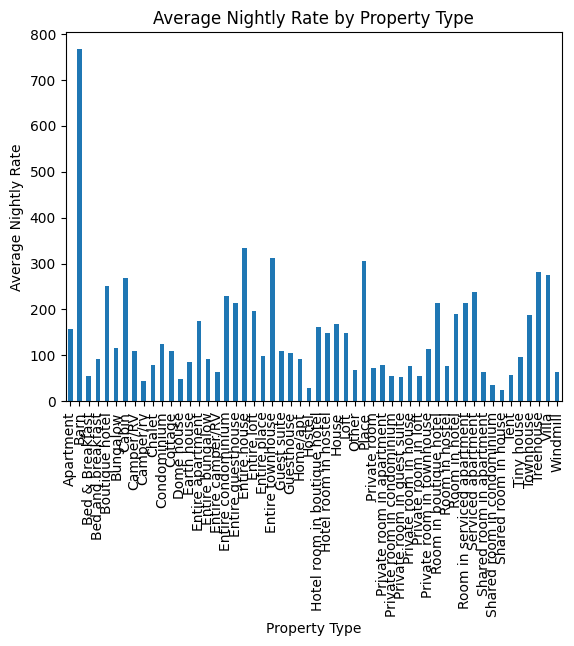

In [6]:
# Calculate average price by property type
avg_price_property_type = df.groupby('Property Type')['Nightly Rate'].mean()

# Plot
avg_price_property_type.plot(kind='bar')
plt.title('Average Nightly Rate by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Nightly Rate')
plt.show()


Average Occupancy Rate by Property Type

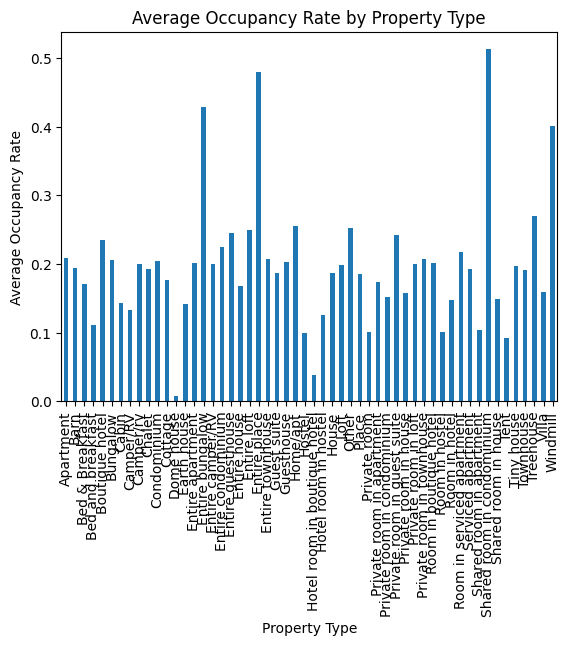

In [7]:
# Calculate average occupancy rate by property type
avg_occupancy_property_type = df.groupby('Property Type')['occupancy_rate'].mean()

# Plot
avg_occupancy_property_type.plot(kind='bar')
plt.title('Average Occupancy Rate by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Occupancy Rate')
plt.show()


. Number of Bookings and Cancellations by Neighborhood

<ipython-input-8-ca5f843a19f5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bookings_cancellations_neighborhood = df.groupby('Neighborhood')['numReserv_pastYear', 'numCancel_pastYear'].sum()


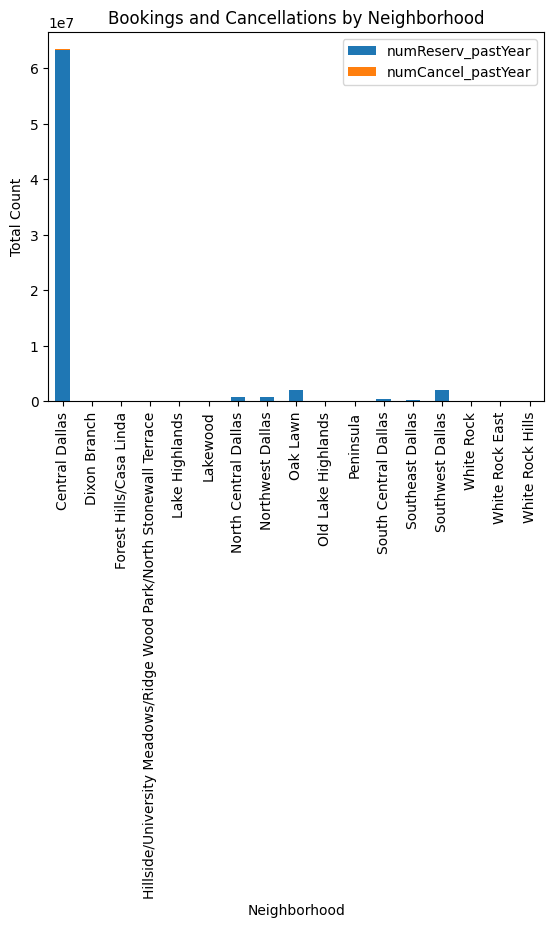

In [8]:
# Group data by neighborhood and calculate total bookings and cancellations
bookings_cancellations_neighborhood = df.groupby('Neighborhood')['numReserv_pastYear', 'numCancel_pastYear'].sum()

# Plot
bookings_cancellations_neighborhood.plot(kind='bar', stacked=True)
plt.title('Bookings and Cancellations by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Total Count')
plt.show()


h. Number of Bookings by Pets Allowed

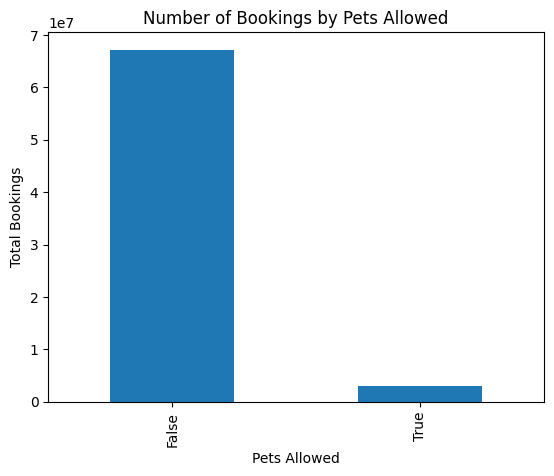

In [9]:
# Group data by pets allowed status and calculate total bookings
bookings_pets_allowed = df.groupby('Pets Allowed')['numReserv_pastYear'].sum()

# Plot
bookings_pets_allowed.plot(kind='bar')
plt.title('Number of Bookings by Pets Allowed')
plt.xlabel('Pets Allowed')
plt.ylabel('Total Bookings')
plt.show()


i. Demographic Influence on Bookings

In [ ]:
# Here, we'll need more specific information about how you want to measure demographic influence.
# For example, we could analyze bookings in relation to the percentage of a certain demographic in the census tract.
# This will require a more complex analysis possibly involving correlation studies.


j. Bookings and Cancellations by Superhost vs Non-Superhost

<ipython-input-10-820e106084c5>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bookings_cancellations_superhost = df.groupby('host_is_superhost_in_period')['numReserv_pastYear', 'numCancel_pastYear'].sum()


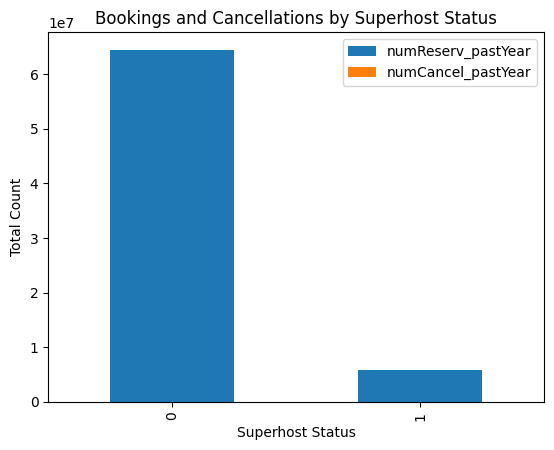

In [10]:
# Group data by superhost status and calculate total bookings and cancellations
bookings_cancellations_superhost = df.groupby('host_is_superhost_in_period')['numReserv_pastYear', 'numCancel_pastYear'].sum()

# Plot
bookings_cancellations_superhost.plot(kind='bar', stacked=True)
plt.title('Bookings and Cancellations by Superhost Status')
plt.xlabel('Superhost Status')
plt.ylabel('Total Count')
plt.show()
